In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Fitness Score

In [59]:
def fitness(chromosome, target):
    return np.mean(np.abs(chromosome - target))

0.5555555555555556

### Evolution

In [100]:
import time

def mutate(gene, mutation_rate):
    return np.random.randint(0, 256) if np.random.rand() < mutation_rate else gene

def evolve_population(population, target, mutation_rate, elite_ratio):
    # The ratio of the population that will be considered
    elite_size = int(len(population) * elite_ratio)

    # Calculate the fitness of each chromosome
    fitnesses = np.array([fitness(chromosome, target) for chromosome in population])

    # Select the elite chromosomes
    elite_indices = np.argsort(fitnesses)[:elite_size]
    elite = [population[i] for i in elite_indices]

    # Create new population
    new_population = elite

    # Reproduce the elite chromosomes
    while len(new_population) < len(population):
        parent1, parent2 = random.choices(elite, k=2)

        # Crossover with possible mutation
        child = np.array(
            [mutate(np.random.choice(gene_pair), mutation_rate) for gene_pair in zip(parent1, parent2)]
        )
        child = child.reshape(parent1.shape)


        new_population.append(child)

    return new_population

### Simulation

In [101]:
def simulate(size, target, mutation_rate, elite_ratio, generations, genome_size = 3):
    population = [np.random.randint(0, 256, size=(genome_size,)) for _ in range(size)]

    for i in range(generations):
        population = evolve_population(population, target, mutation_rate, elite_ratio)

        print(f"Timestamp 5: {time.strftime('%H:%M:%S')}")
        best_fit = min(population, key=lambda x: fitness(x, target))
        print(f"Timestamp 6: {time.strftime('%H:%M:%S')}")
        images.append(best_fit)

        print(f"Generation {i}: Best fitness: {fitness(best_fit, target)}")

    return min(population, key=lambda x: fitness(x, target))

In [102]:
images = []

population_size = 500
mutation_rate = 0.01
elite_ratio = 0.1
generations = 100

target = np.array([120, 80, 105])

start_time = time.time()
print(f"Start time: {time.strftime('%H:%M:%S')}")
best_fit = simulate(
    population_size,
    np.tile(target, 16 * 16),
    mutation_rate,
    elite_ratio,
    generations,
    genome_size=16 * 16 * 3,
)

print(f"Time taken: {time.time() - start_time}")

Start time: 19:43:35
Timestamp 5: 19:43:37
Timestamp 6: 19:43:37
Generation 0: Best fitness: 60.110677083333336
Timestamp 5: 19:43:38
Timestamp 6: 19:43:38
Generation 1: Best fitness: 58.96484375
Timestamp 5: 19:43:39
Timestamp 6: 19:43:39
Generation 2: Best fitness: 57.205729166666664
Timestamp 5: 19:43:41
Timestamp 6: 19:43:41
Generation 3: Best fitness: 55.89453125
Timestamp 5: 19:43:42
Timestamp 6: 19:43:42
Generation 4: Best fitness: 53.791666666666664
Timestamp 5: 19:43:44
Timestamp 6: 19:43:44
Generation 5: Best fitness: 53.002604166666664
Timestamp 5: 19:43:45
Timestamp 6: 19:43:45
Generation 6: Best fitness: 51.596354166666664
Timestamp 5: 19:43:46
Timestamp 6: 19:43:46
Generation 7: Best fitness: 50.069010416666664
Timestamp 5: 19:43:48
Timestamp 6: 19:43:48
Generation 8: Best fitness: 48.947916666666664
Timestamp 5: 19:43:49
Timestamp 6: 19:43:49
Generation 9: Best fitness: 48.46875
Timestamp 5: 19:43:51
Timestamp 6: 19:43:51
Generation 10: Best fitness: 46.05078125
Timestam

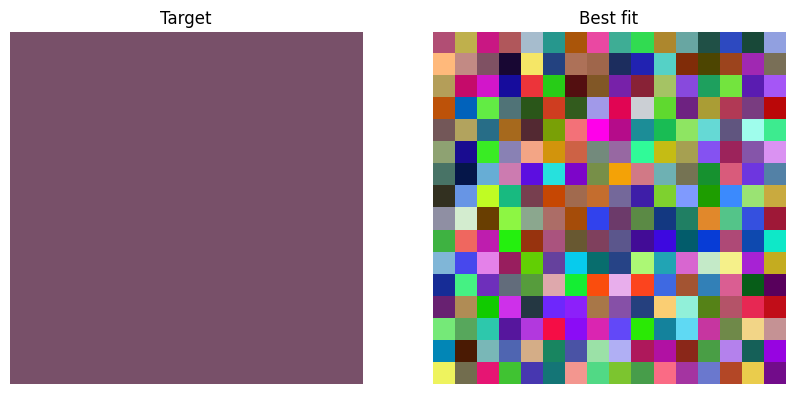

In [84]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt

# Plot the colours
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(np.reshape(target / 255, (1, 1, 3)))
ax[0].set_title("Target")
ax[0].axis("off")

img_display = ax[1].imshow(images[0])
ax[1].set_title("Best fit")
ax[1].axis("off")


# Define the update function for the animation
def update(frame):
    img_display.set_data(images[frame])
    return [img_display]


# Create the animation
ani = FuncAnimation(fig, update, frames=len(images), interval=100, blit=False)

# Display the animation as HTML
HTML(ani.to_jshtml())